# <center>Role of Twitter in Canadian Elections</center>
**<center>Group 8</center>**

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import nltk

In [174]:
data=pd.read_json("Election Tweets.json")

In [175]:
data.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,possibly_sensitive,retweeted_status,extended_entities
4961,2019-10-01 20:39:38+00:00,1179133796484038658,1.179134e+18,@carolemacneil @CBCNews Isn't it true some imm...,0.0,"[24, 209]","{'hashtags': [{'text': 'AskCBCNews', 'indices'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1.179102e+18,1.179102e+18,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,2019-10-01 22:26:42+00:00,1179160740038680577,1.179161e+18,UNHCR Canada was referenced a few times in thi...,0.0,"[0, 181]","{'hashtags': [{'text': 'cdnimm', 'indices': [1...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0.0,0.0,en,1.179109e+18,1.179109e+18,"{'url': 'https://t.co/vMKXXiznP4', 'expanded':...",{'created_at': 'Tue Oct 01 19:00:08 +0000 2019...,0.0,NaN,NaN
4963,2019-10-01 18:33:34+00:00,1179102068738531329,1.179102e+18,What questions do you have about immigration i...,0.0,"[0, 204]","{'hashtags': [{'text': 'cdnpoli', 'indices': [...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4964,2019-10-01 23:47:22+00:00,1179181040423854080,1.179181e+18,"""Fundamentally, ⁦@AndrewScheer⁩ is talking abo...",0.0,"[0, 255]","{'hashtags': [{'text': 'canpoli', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,0.0,NaN,"{'media': [{'id': 1179181036019867648, 'id_str..."
4965,2019-10-02 00:01:48+00:00,1179184671613022208,1.179185e+18,@LizT1\nOnward lawsuit against #Canadian #FATC...,0.0,"[0, 279]","{'hashtags': [{'text': 'Canadian', 'indices': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0.0,0.0,en,NaN,NaN,NaN,NaN,0.0,NaN,NaN


**Extracting usernames from json format and storing in original dataset in new column.**

In [176]:
mention_screen_names = []
for entry in data['entities']:
    if isinstance(entry, dict) and 'user_mentions' in entry:
        user_mentions = entry['user_mentions']
        if isinstance(user_mentions, list) and user_mentions:
            mention_screen_names.append(user_mentions[0]['screen_name'])
        else:
            mention_screen_names.append(None)
    else:
        mention_screen_names.append(None)


data['mention_screen_name'] = mention_screen_names

**Plotting top 25 usernames involved in the tweets.**

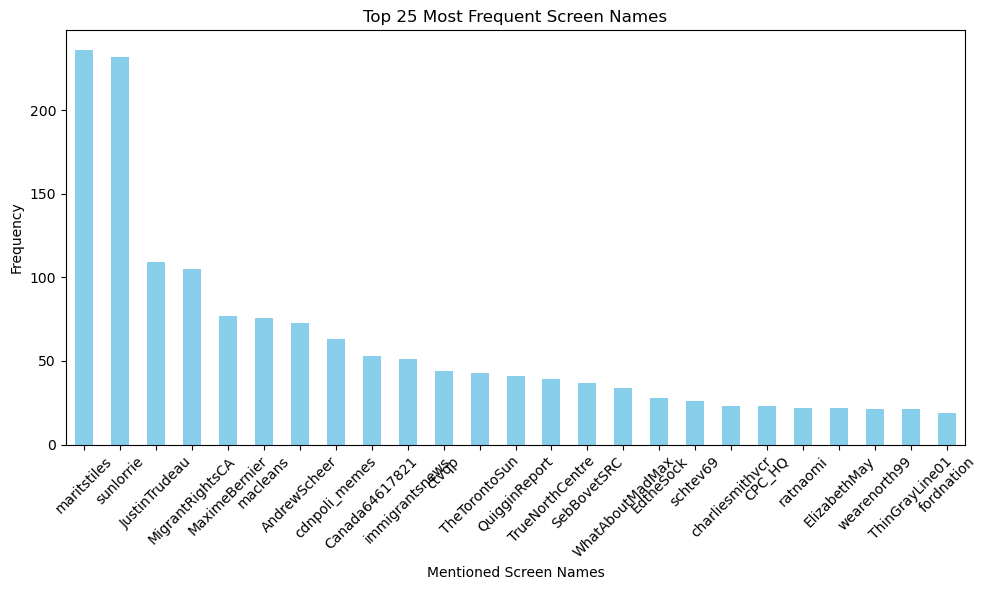

In [177]:
# Plotting frequency distribution excluding None values
#extracting not null rows for 'mention_screen_name' column.
filtered_values = data['mention_screen_name'][data['mention_screen_name'].notnull()]
top_25_values = filtered_values.value_counts().head(25)

# Plotting the top 25 values
plt.figure(figsize=(10, 6))
top_25_values.plot(kind='bar', color='skyblue')
plt.xlabel('Mentioned Screen Names')
plt.ylabel('Frequency')
plt.title('Top 25 Most Frequent Screen Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Converting Data to lower case**

In [178]:
data['full_text']=data['full_text'].str.lower()

**Removing Stop Words**

In [179]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ktanj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    '''
    Args:
    (text): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words concatenated with '.' in 'text' after removing stopwords.
    '''
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['full_text'] = data['full_text'].apply(lambda text: cleaning_stopwords(text))
data['full_text'].head()

0    @ctvnews wonder why. no. wait. don’t. #immigra...
1    warning canadians threat open borders too. un/...
2    @dicintio sleeping forever! #vote #liberals #f...
3    #snclavalin never existed would #andrewscheer ...
4    rt @wolfer_dot_ca: immigrant diversity killed ...
Name: full_text, dtype: object

**Removing Punctuations**

In [181]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    '''
    Args:
    (text): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words in 'text' after removing punctuations.
    '''
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [182]:
data['full_text']= data['full_text'].apply(lambda x: cleaning_punctuations(x))
data['full_text'].head()

0    ctvnews wonder why no wait don’t immigration c...
1    warning canadians threat open borders too ungl...
2    dicintio sleeping forever vote liberals forall...
3    snclavalin never existed would andrewscheer ta...
4    rt wolferdotca immigrant diversity killed cana...
Name: full_text, dtype: object

**Removing Repetitive words.**

In [183]:
def cleaning_repeating_char(text):
    '''
    Args:
    (text): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words in 'text' after removing repetitive words, i.e.,
    If a word matches with next word then remove one of the repetition.
    '''
    return re.sub(r'(.)\1+', r'\1', text)


In [184]:
data['full_text'] = data['full_text'].apply(lambda x: cleaning_repeating_char(x))
data['full_text'].head()

0    ctvnews wonder why no wait don’t imigration cd...
1    warning canadians threat open borders to unglo...
2    dicintio sleping forever vote liberals foralpe...
3    snclavalin never existed would andrewscher tal...
4    rt wolferdotca imigrant diversity kiled canadi...
Name: full_text, dtype: object

**Removing mails**

In [185]:
def cleaning_email(data):
    '''
    Args:
    (data): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words in 'data' after removing mail suffix like'@gmailcom'.
    '''
    
    return re.sub('@[^\s]+', ' ', data)

In [186]:
data['full_text']= data['full_text'].apply(lambda x: cleaning_email(x))
data['full_text'].tail()

4961    carolemacneil cbcnews true imigrants come cana...
4962    unhcr canada referenced times piece info iregu...
4963    questions imigration isues heading election tw...
4964    fundamentaly ⁦andrewscher⁩ talking imunizing f...
4965    lizt1 onward lawsuit canadian fatca iga canada...
Name: full_text, dtype: object

**Removing URLS**

In [187]:
def cleaning_URLs(data):
    '''
    Args:
    (data): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words in 'data' after removing urls.
    '''
    
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [188]:
data['full_text'] = data['full_text'].apply(lambda x: cleaning_URLs(x))
data['full_text'].tail()

4961    carolemacneil cbcnews true imigrants come cana...
4962    unhcr canada referenced times piece info iregu...
4963    questions imigration isues heading election tw...
4964    fundamentaly ⁦andrewscher⁩ talking imunizing f...
4965    lizt1 onward lawsuit canadian fatca iga canada...
Name: full_text, dtype: object

**Removing Numbers**

In [189]:
def cleaning_numbers(data):
    '''
    Args:
    (data): the text from each record in 'full_text' column to be cleaned.
    
    Returns: words in 'data' after removing numbers.
    '''
    return re.sub('[0-9]+', '', data)

In [190]:
data['full_text'] = data['full_text'].apply(lambda x: cleaning_numbers(x))
data['full_text'].tail()

4961    carolemacneil cbcnews true imigrants come cana...
4962    unhcr canada referenced times piece info iregu...
4963    questions imigration isues heading election tw...
4964    fundamentaly ⁦andrewscher⁩ talking imunizing f...
4965    lizt onward lawsuit canadian fatca iga canada ...
Name: full_text, dtype: object

**Tokenizing Text to convert text string to substring of words.**

In [191]:
tokenizer = RegexpTokenizer(r'\w+')
data['full_text'] = data['full_text'].apply(tokenizer.tokenize)

**Stemming the tweets.**

In [192]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    '''
    Args:
    (data): the text from each record in 'full_text' column to be cleaned.
    
    Returns: transformed data after applying stemming .
    '''
    text = [st.stem(word) for word in data]
    return data

data['full_text']= data['full_text'].apply(lambda x: stemming_on_text(x))

In [193]:
data['full_text'].head()

0    [ctvnews, wonder, why, no, wait, don, t, imigr...
1    [warning, canadians, threat, open, borders, to...
2    [dicintio, sleping, forever, vote, liberals, f...
3    [snclavalin, never, existed, would, andrewsche...
4    [rt, wolferdotca, imigrant, diversity, kiled, ...
Name: full_text, dtype: object

**Lemmatization the tweets.**

In [194]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    '''
    Args:
    (data): the text from each record in 'full_text' column to be cleaned.
    
    Returns: transformed data after applying stemming .
    '''
    text = [lm.lemmatize(word) for word in data]
    return data

data['full_text'] = data['full_text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ktanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [195]:
data['full_text'].head()

0    [ctvnews, wonder, why, no, wait, don, t, imigr...
1    [warning, canadians, threat, open, borders, to...
2    [dicintio, sleping, forever, vote, liberals, f...
3    [snclavalin, never, existed, would, andrewsche...
4    [rt, wolferdotca, imigrant, diversity, kiled, ...
Name: full_text, dtype: object

**To observe the frequency of each word in the tweets.**

In [196]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

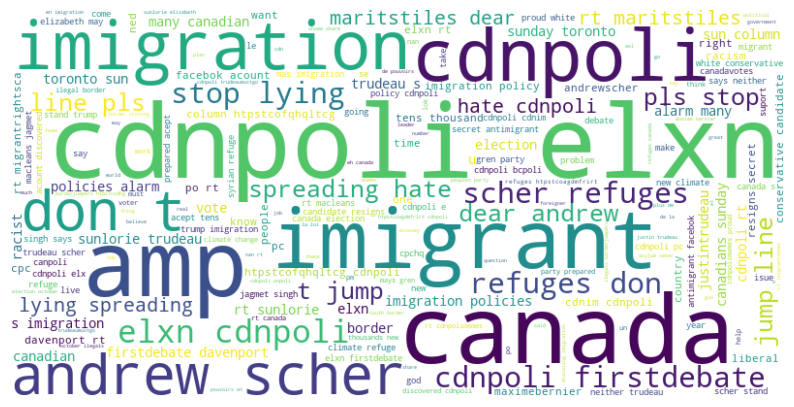

In [197]:
#storing full_text in 'data2'
tweet_data = pd.Series(data["full_text"])

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in tweet_data for token in sublist]

# Join all tokens into a single string
combined_text = ' '.join(all_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## <center>Sentiment Analysis</center>

**Text Labeling Using TextBlob on the Basis of the Text Polarity**

In [198]:
from textblob import TextBlob

In [199]:
def getPolarity(text):
        return TextBlob(text).sentiment.polarity

In [200]:
def sentiment_analysis(data):
    '''
    Args:
    (data): dataframe for analysis.
    
    Returns: returns update dataframe with 'Polarity' and 'Labels' columns representing negative or positive sentiment.
    '''
    # Iterate over each row in the DataFrame
    for index, row in data.iterrows():
        text = row['full_text']
        text = ' '.join(text)
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        polarity = getPolarity(text)

        # Assign values to new columns for each row
        data.at[index, 'Polarity'] = polarity

        # Assign sentiment analysis based on polarity
        data.at[index, 'Labels'] = 'Negative' if polarity <= 0  else 'Positive'

    return data

# Call the sentiment analysis function with your data DataFrame
data = sentiment_analysis(data)

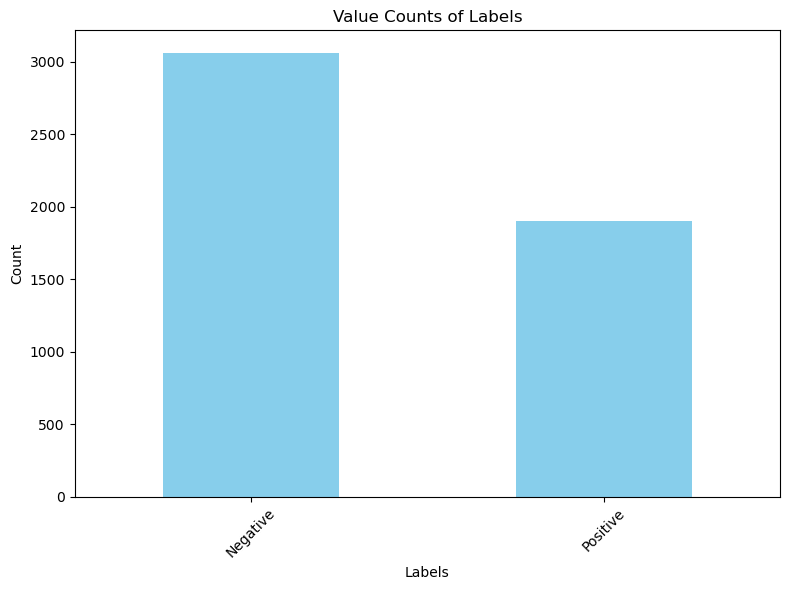

In [201]:
# Get value counts of the 'Labels' column
label_counts = data['Labels'].value_counts()

# Create a bar plot for the value counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

## <center> Sentiment analysis of tweets by screen_names.</center>

**DataFrame based on the top 25 values**

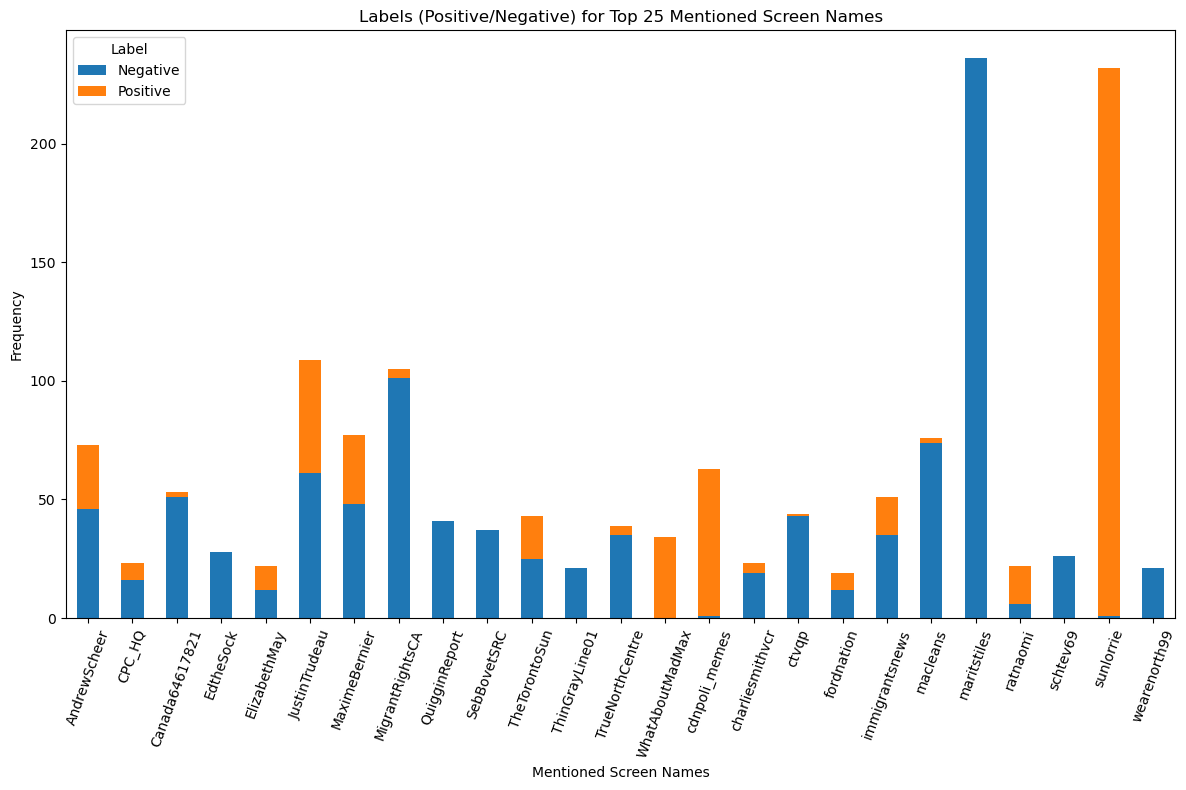

In [202]:
# Filter the DataFrame to consider non-null 'mention_screen_name' values
filtered_data = data[data['mention_screen_name'].notnull()]

# Get the top 25 most frequent non-null 'mention_screen_name' values
top_25_values = filtered_data['mention_screen_name'].value_counts().head(25).index.tolist()

# Filter the DataFrame based on the top 25 values
filtered_top_25 = filtered_data[filtered_data['mention_screen_name'].isin(top_25_values)]

# Group by 'mention_screen_name' and aggregate labels to find their counts
grouped_data = filtered_top_25.groupby('mention_screen_name')['Labels'].value_counts().unstack().fillna(0)

# Plotting the counts of labels for each 'mention_screen_name' in the top 25 values
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Mentioned Screen Names')
plt.ylabel('Frequency')
plt.title('Labels (Positive/Negative) for Top 25 Mentioned Screen Names')
plt.legend(title='Label')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [203]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ktanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [204]:
from nltk.probability import FreqDist

In [205]:
from textblob import TextBlob

# Initialize empty lists for positive and negative words
positive_words = []
negative_words = []

# Example iteration over each text in the 'full_text' column
for index, row in data.iterrows():
    text = row['full_text']
    text_list = row['full_text']  # Assuming 'full_text' is a list of strings
    for text in text_list:
        blob = TextBlob(text)
        for word in blob.words:
            polarity = TextBlob(word).sentiment.polarity

            # Check polarity and categorize words accordingly
            if polarity <= 0:
                negative_words.append(word)  # Append negative words
            else:
                positive_words.append(word)  # Append positive words

# Display a few words from each list
print("Positive Words:", positive_words[:10])  # Display first 10 positive words
print("Negative Words:", negative_words[:10])  # Display first 10 negative words


Positive Words: ['cheap', 'social', 'light', 'exactly', 'safe', 'cultural', 'significant', 'win', 'competent', 'vibrant']
Negative Words: ['ctvnews', 'wonder', 'why', 'no', 'wait', 'don', 't', 'imigration', 'cdnpoli', 'warning']


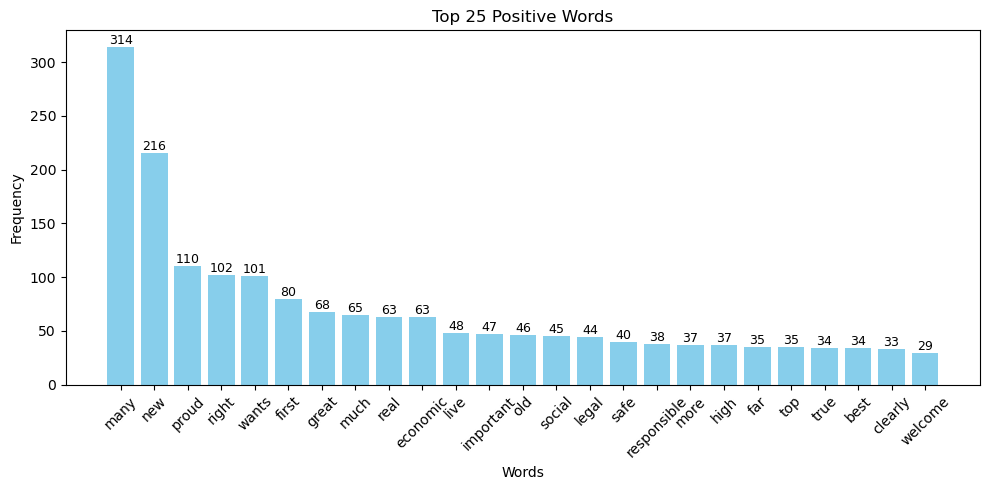

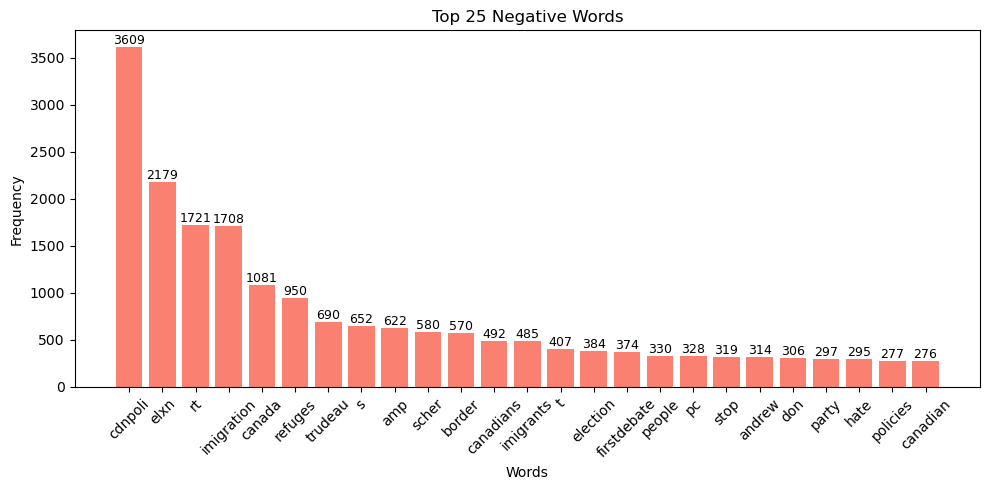

In [206]:
# Calculate frequency distributions for positive and negative words
positive_freq_dist = FreqDist(positive_words)
negative_freq_dist = FreqDist(negative_words)

# Get top 25 positive and negative words
top_25_positive = positive_freq_dist.most_common(25)
top_25_negative = negative_freq_dist.most_common(25)

# Plotting the frequency distribution of top 25 positive words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_25_positive), color='skyblue')
plt.title('Top 25 Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add counts on top of each bar for top 25 positive words
for i, (word, freq) in enumerate(top_25_positive):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plotting the frequency distribution of top 25 negative words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_25_negative), color='salmon')
plt.title('Top 25 Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add counts on top of each bar for top 25 negative words
for i, (word, freq) in enumerate(top_25_negative):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [207]:
# Get top 40 most frequent positive and negative words
top_40_positive = positive_freq_dist.most_common(40)
top_40_negative = negative_freq_dist.most_common(40)


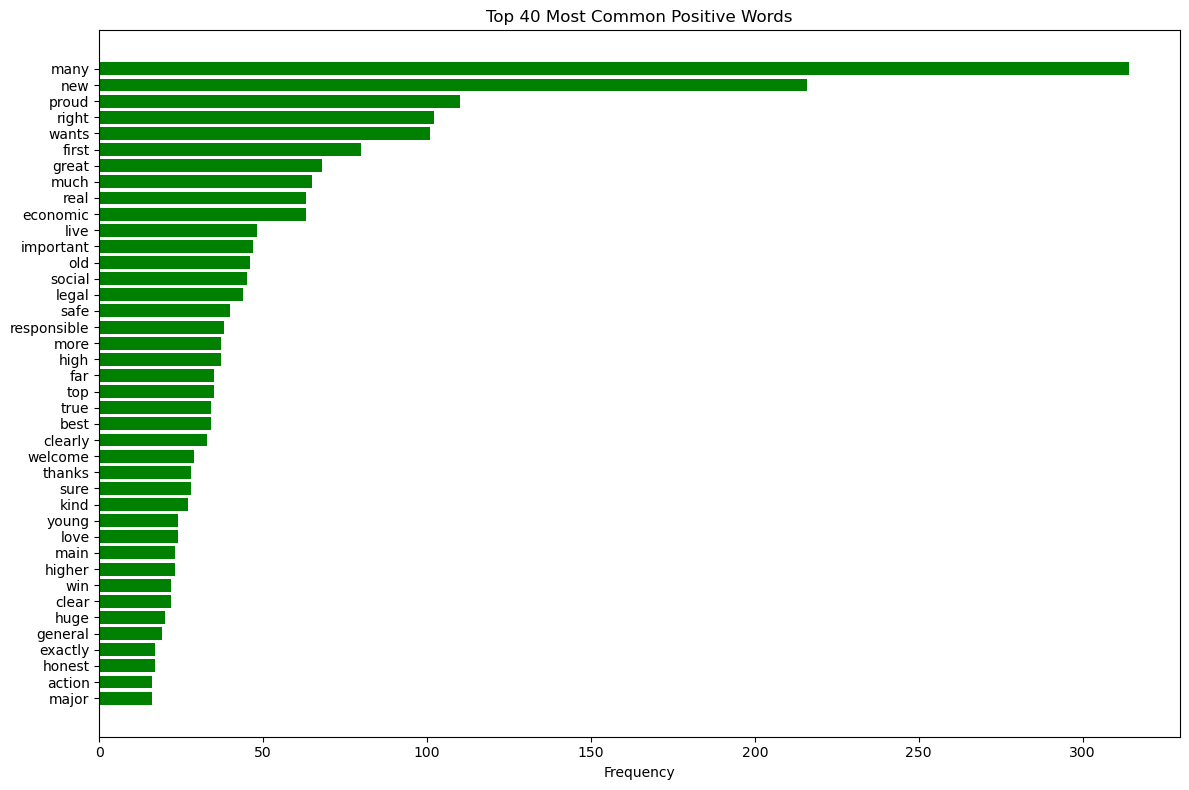

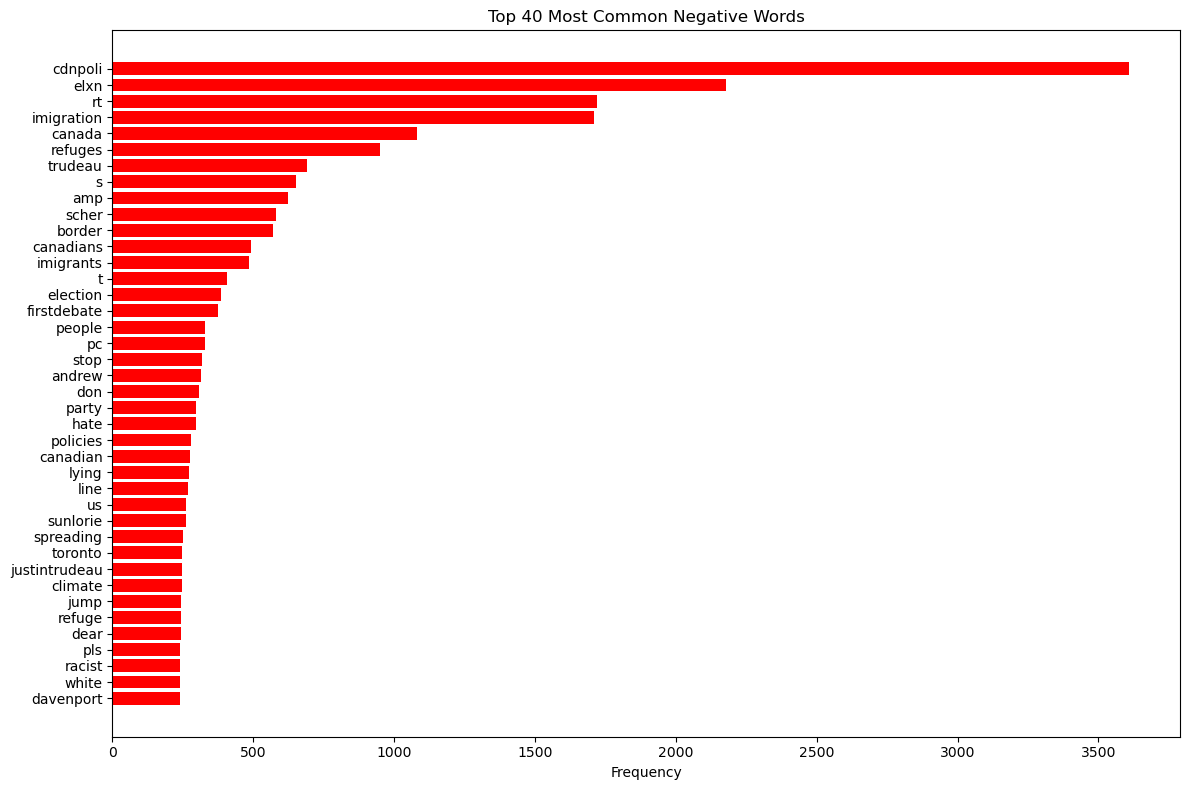

In [208]:
# Extract words and frequencies for plotting
top_40_positive_words, top_40_positive_freq = zip(*top_40_positive)
top_40_negative_words, top_40_negative_freq = zip(*top_40_negative)

# Plotting the top 40 most common words in positive category
plt.figure(figsize=(12, 8))
plt.barh(top_40_positive_words, top_40_positive_freq, color='green')
plt.xlabel('Frequency')
plt.title('Top 40 Most Common Positive Words')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent words at the top
plt.tight_layout()
plt.show()

# Plotting the top 40 most common words in negative category
plt.figure(figsize=(12, 8))
plt.barh(top_40_negative_words, top_40_negative_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 40 Most Common Negative Words')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent words at the top
plt.tight_layout()
plt.show()

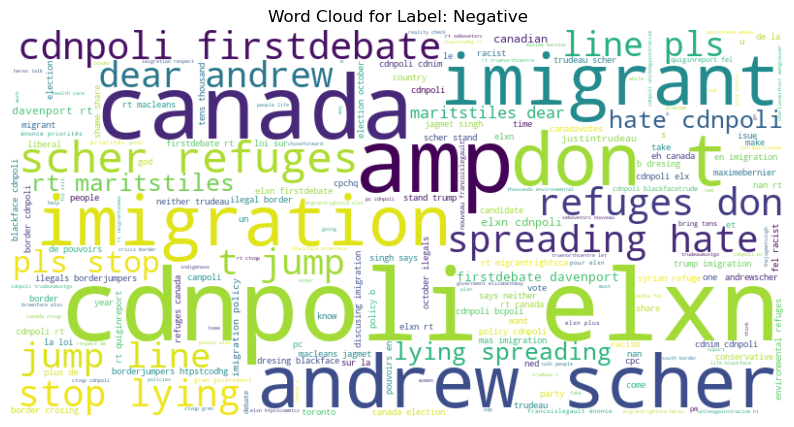

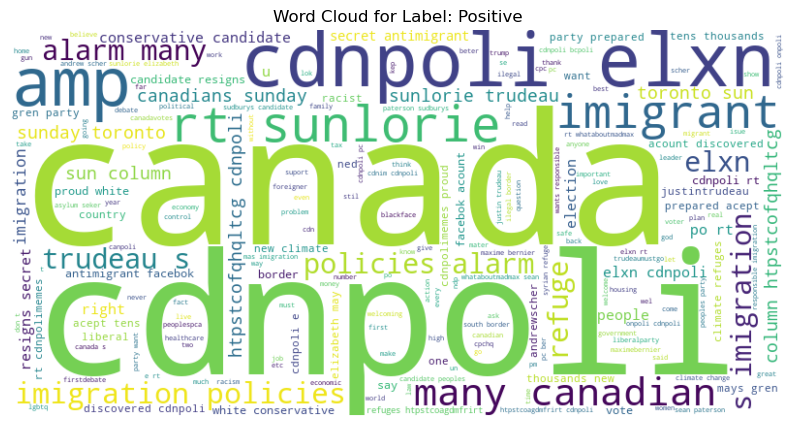

In [209]:
# Iterate through each label and generate a word cloud
for label in data['Labels'].unique():
    # Filter text data for the specific label
    text_for_label = data[data['Labels'] == label]['full_text']

    # Combine all tokens into a single string for the label
    combined_text = ' '.join([' '.join(text) for text in text_for_label])

    # Generate word cloud for the label
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis('off')
    plt.show()

## <center>ML MODEL LOGISTIC REGRESSION</center>

**To predict sentiment of a tweet by negative and positive label.**

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


In [211]:
# Extracting features (full_text) and labels from the DataFrame
data['texts'] = data['full_text'].apply(lambda x: ' '.join(x))  # Joining the list of words into a single string per row

# Label encoding for categorical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['Labels'])


**Dividing dataset into training - 80% and testing - 20%.**

In [212]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['texts'], encoded_labels, test_size=0.2, random_state=42)


**Training the model using training dataset.**

In [213]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data into TF-IDF matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data into TF-IDF matrix using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

**Predictions on testing dataset.**

In [214]:
# Make predictions on the test set
predictions = logistic_regression.predict(X_test_tfidf)
# Inverse transform the encoded predictions to original labels
decoded_predictions = label_encoder.inverse_transform(predictions)

**Calculating accuracy of predictions.**

In [215]:
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8490945674044266
Precision: 0.8616678070705477
Recall: 0.8490945674044266
F1 Score: 0.8425567688707503


**Plotting confusion matrix using heatmap.**

[[591  19]
 [131 253]]


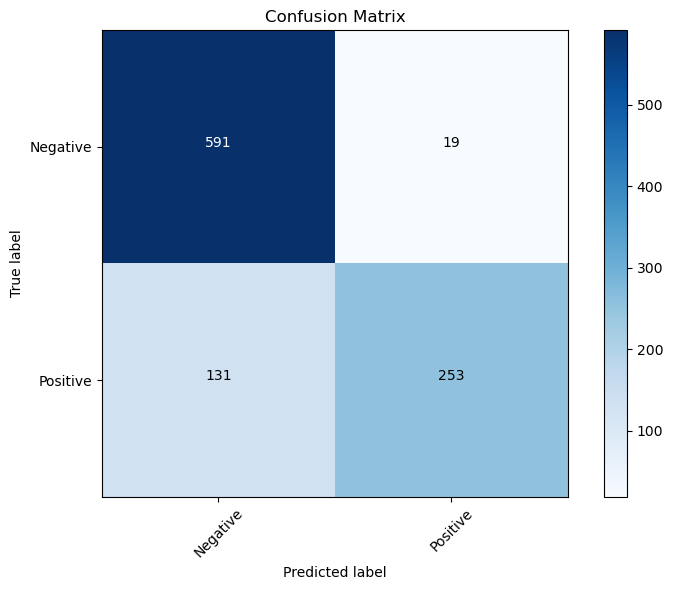

In [216]:
from sklearn.metrics import confusion_matrix



# Make predictions on the test set
predictions = logistic_regression.predict(X_test_tfidf)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks for labels
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

# Display values in the matrix
for i in range(len(label_encoder.classes_)):
    for j in range(len(label_encoder.classes_)):
        plt.text(j, i, str(conf_matrix[i][j]), horizontalalignment='center', color='white' if conf_matrix[i][j] > conf_matrix.max() / 2 else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### <center>Networking using sentiment labels and the Cleaned tweet text tokens</center>

In [217]:
import networkx as nx
from collections import Counter
from itertools import combinations
from collections import defaultdict

**Network on the basis of co-occurance of words in the tweets.**

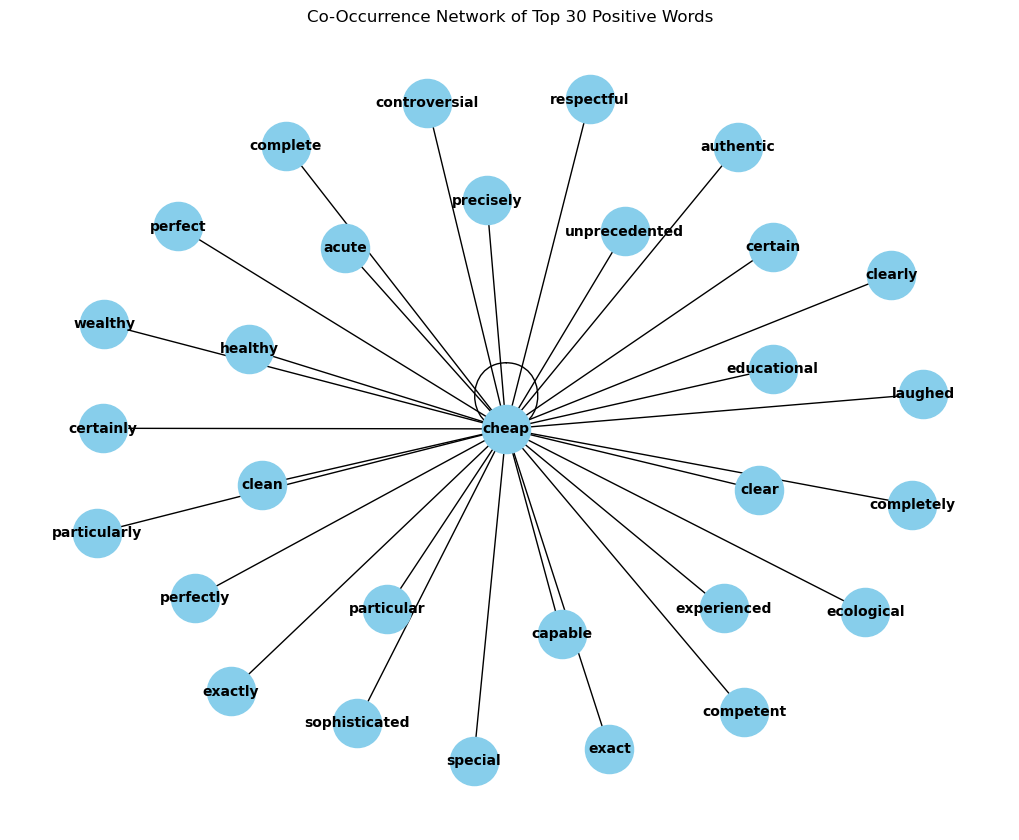

In [218]:
import itertools
# Create an empty graph
G = nx.Graph()

# Simulate co-occurrence connections between top positive words (hypothetical example)
# Here, we generate connections between pairs of positive words based on some criteria
# This example stops creating edges when the number of nodes reaches 30
node_count = 0
for pair in itertools.combinations(positive_words, 2):
    # Check if the number of nodes in the graph reaches 30
    if node_count >= 30:
        break

    # Simulating connections based on a condition (e.g., similarity, semantic relation, etc.)
    # Here, a simple condition is used to establish connections between pairs of positive words
    if len(set(pair[0]).intersection(set(pair[1]))) >= 3:
        G.add_edge(pair[0], pair[1])
        node_count = len(G.nodes())

# Visualize the co-occurrence network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10, font_weight='bold')

plt.title('Co-Occurrence Network of Top 30 Positive Words')
plt.show()

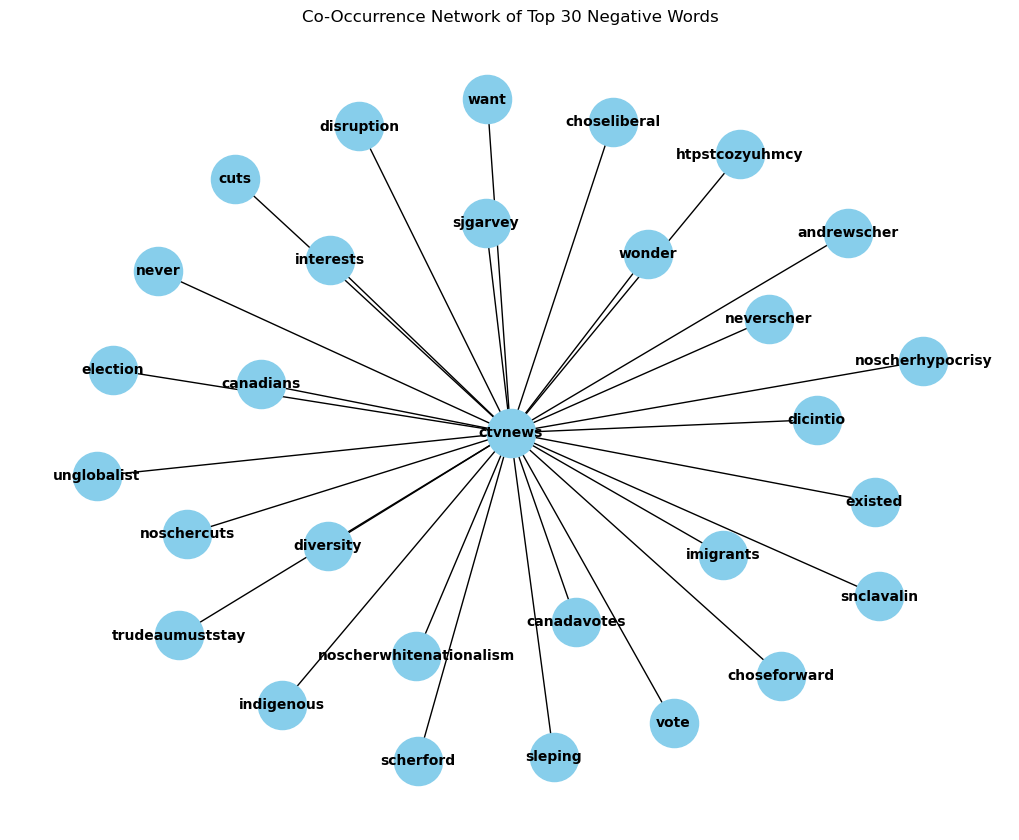

In [219]:
# Create an empty graph
G = nx.Graph()

# Simulate co-occurrence connections between top positive words (hypothetical example)
# Here, we generate connections between pairs of positive words based on some criteria
# This example stops creating edges when the number of nodes reaches 30
node_count = 0
for pair in itertools.combinations(negative_words, 2):
    # Check if the number of nodes in the graph reaches 30
    if node_count >= 30:
        break

    # Simulating connections based on a condition (e.g., similarity, semantic relation, etc.)
    # Here, a simple condition is used to establish connections between pairs of positive words
    if len(set(pair[0]).intersection(set(pair[1]))) >= 3:
        G.add_edge(pair[0], pair[1])
        node_count = len(G.nodes())

# Visualize the co-occurrence network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10, font_weight='bold')

plt.title('Co-Occurrence Network of Top 30 Negative Words')
plt.show()

In [220]:
# Create a dictionary to store co-occurrences per label
co_occurrences = defaultdict(nx.Graph)


In [221]:
# Process each row in the DataFrame---??
for index, row in data.iterrows():
    label = row['Labels']
    text = row['full_text']

    #Create edges for co-occurring words in the same text
    #creating possible combination of 2 elements in 'text'.
    for w1, w2 in combinations(text, 2):
        if not co_occurrences[label].has_edge(w1, w2):
            co_occurrences[label].add_edge(w1, w2, weight=1)
        else:
            co_occurrences[label][w1][w2]['weight'] += 1

Network for Label: Positive


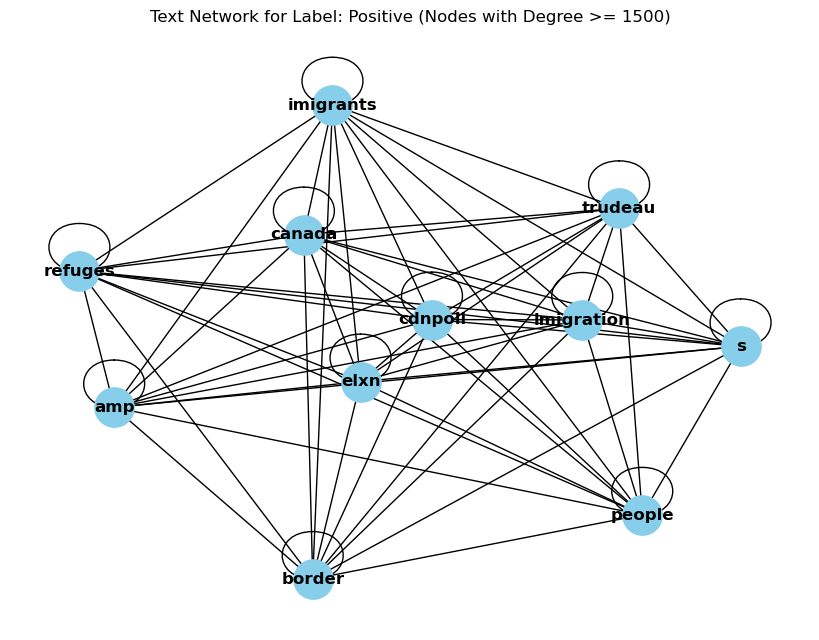

In [222]:
# Define the label for which you want to visualize the network
target_label = "Positive"  # Replace 'label 1' with your actual label name

# Create and visualize the network for the specific label
if target_label in co_occurrences:
    print(f"Network for Label: {target_label}")
    G = nx.Graph(co_occurrences[target_label])

    # Get nodes with higher degrees (adjust the threshold as needed)
    degree_threshold = 1500
    high_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]

    # Create a subgraph with only high-degree nodes
    subgraph = G.subgraph(high_degree_nodes)

    # Visualize the subgraph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_size=800, node_color='skyblue', font_weight='bold')
    plt.title(f"Text Network for Label: {target_label} (Nodes with Degree >= {degree_threshold})")
    plt.show()
else:
    print(f"No data found for Label: {target_label}")


Network for Label: Negative


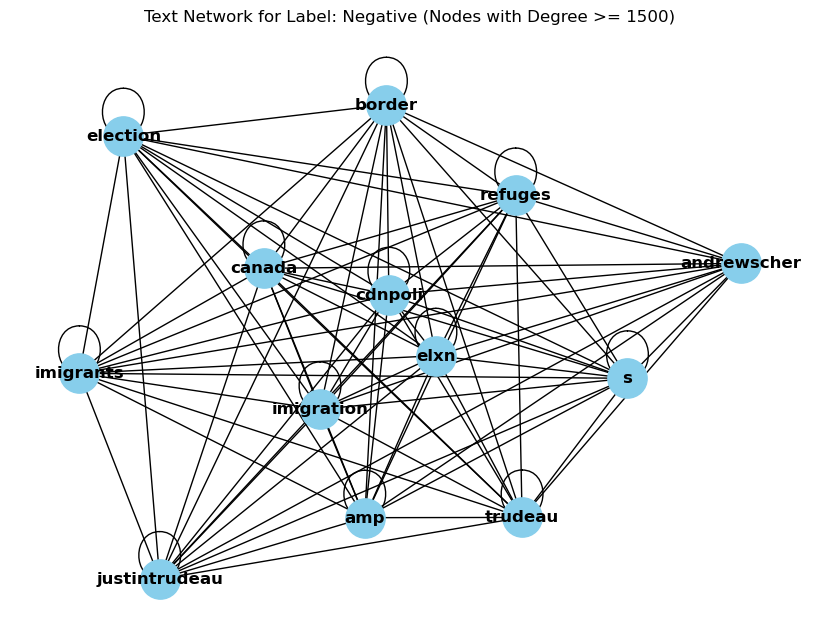

In [223]:
# Define the label for which you want to visualize the network
target_label = "Negative"  # Replace 'label 1' with your actual label name

# Create and visualize the network for the specific label
if target_label in co_occurrences:
    print(f"Network for Label: {target_label}")
    G = nx.Graph(co_occurrences[target_label])

    # Get nodes with higher degrees (adjust the threshold as needed)
    degree_threshold = 1500
    high_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]

    # Create a subgraph with only high-degree nodes
    subgraph = G.subgraph(high_degree_nodes)

    # Visualize the subgraph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_size=800, node_color='skyblue', font_weight='bold')
    plt.title(f"Text Network for Label: {target_label} (Nodes with Degree >= {degree_threshold})")
    plt.show()
else:
    print(f"No data found for Label: {target_label}")


**Checking for mention of 'Migration' word by different screen_names.**

In [224]:
# Function to count occurrences of 'migration' in 'full_text' column for each row
def count_migration_words(text):
    return text.count('migration')

# Apply the function to count 'migration' words for each row
data['migration_word_count'] = data['full_text'].apply(count_migration_words)

# Group by 'mention_screen_name' and calculate the total 'migration' word count
migration_counts = data.groupby('mention_screen_name')['migration_word_count'].sum()

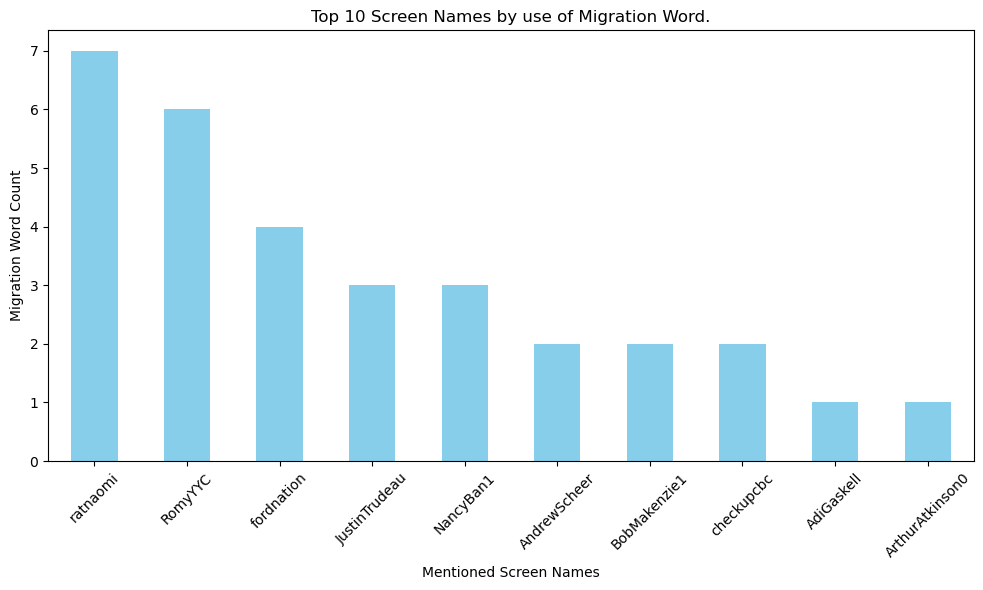

In [225]:
# Get the top 10 mention_screen_name based on 'migration' word count
top_10_migration_counts = migration_counts.nlargest(10)

# Plotting the top 10 mention_screen_name with highest 'migration' word counts
plt.figure(figsize=(10, 6))
top_10_migration_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Mentioned Screen Names')
plt.ylabel('Migration Word Count')
plt.title('Top 10 Screen Names by use of Migration Word.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Pivot Plot**

In [226]:
# Function to flatten the 'full_text' column
def flatten_text(text_list):
    return ' '.join(text_list)

# Apply the function to create a flattened 'full_text' column
data['flattened_text'] = data['full_text'].apply(flatten_text)

# Get the most common words across all 'mention_screen_name'
all_words_freq = pd.Series(' '.join(data['flattened_text']).split()).value_counts().nlargest(10)
top_10_words = all_words_freq.index.tolist()

# Get the top 10 most common Mentioned Screen Names
top_10_mentions = data['mention_screen_name'].value_counts().nlargest(10).index.tolist()

# Filter DataFrame to include only top 10 Mentioned Screen Names
data_top_10 = data[data['mention_screen_name'].isin(top_10_mentions)]

# Create a DataFrame to store counts of top 10 words for each 'mention_screen_name'
word_data = []

for mention in top_10_mentions:
    mention_df = data_top_10[data_top_10['mention_screen_name'] == mention]
    for word in top_10_words:
        # Count positive and negative occurrences for each word within this mention
        pos_count = mention_df[mention_df['Labels'] == 'Positive']['flattened_text'].str.count(word).sum()
        neg_count = mention_df[mention_df['Labels'] == 'Negative']['flattened_text'].str.count(word).sum()
        word_data.append({'Word': word, 'mention_screen_name': mention, 'Positive': pos_count, 'Negative': neg_count})

# Create a DataFrame with word counts for each mention and word
word_counts_df = pd.DataFrame(word_data)

# Create the pivot table
pivot_table = pd.pivot_table(word_counts_df, values=['Positive', 'Negative'], index='mention_screen_name', columns='Word', fill_value=0)



In [227]:
# Create the pivot table
pivot_table1 = pd.pivot_table(word_counts_df, values=['Positive', 'Negative'], index='mention_screen_name', columns='Word', fill_value=0)

pivot_table2 = pd.DataFrame(index=top_10_mentions, columns=pd.MultiIndex.from_product([top_10_words, ['Positive', 'Negative']]))


In [228]:
words_to_swap=top_10_words
# Loop through each word and swap 'Positive' and 'Negative' values in the pivot table
for word in words_to_swap:
    pivot_table2[(word, 'Positive')] = pivot_table1[('Positive', word)]
    pivot_table2[(word, 'Negative')] = pivot_table1[('Negative', word)]

**Top usernames with frequency of top words in positive and negative context.**

In [229]:
pivot_table2

cdnpoli              elxn                rt           \
                Positive Negative Positive Negative Positive Negative   
maritstiles            0      236        0        0        0      472   
sunlorrie            231        1        1        0      348        0   
JustinTrudeau         37       49       27       33       23       19   
MigrantRightsCA        2       39        4      100        2      117   
MaximeBernier         26       34       12       27       10       25   
macleans               1       74        2       72        1       70   
AndrewScheer          21       34        8       32       13       15   
cdnpoli_memes        124        1        0        1       62        0   
Canada64617821         2        0        0        0        2       51   
immigrantsnews         6       16       12       26       22       48   

                imigration            canada           refuges           \
                  Positive Negative Positive Negative Positive Negative   
maritstiles              0        0        0        0        0      236   
sunlorrie              161        0        0        0       59        0   
JustinTrudeau            8       15       17       27       10       10   
MigrantRightsCA          0        0        0        1        0        0   
MaximeBernier           20       40       11       20        1        1   
macleans                 2       71        0        1        0        4   
AndrewScheer             8        8       11       10        5       12   
cdnpoli_memes            0        0        0        1        0        0   
Canada64617821           0        0        6      102        0        0   
immigrantsnews           0        0        0        3        0        0   

                 trudeau                 s               amp           \
                Positive Negative Positive Negative Positive Negative   
maritstiles            0        0        0     1888        0        0   
sunlorrie            161        0     1585        7        0        0   
JustinTrudeau         66       94      515      577       14       21   
MigrantRightsCA        2        1       36      511        1        7   
MaximeBernier         11       10      240      426        6        9   
macleans               1       71       24      532        3        1   
AndrewScheer          12        7      290      514        5       20   
cdnpoli_memes          0        0      372       17        0        0   
Canada64617821         0        0        6      306        0        0   
immigrantsnews         0        6       87      213        0        6   

                   scher           
                Positive Negative  
maritstiles            0      236  
sunlorrie              0        0  
JustinTrudeau          5        8  
MigrantRightsCA        0        5  
MaximeBernier          1        5  
macleans               1       73  
AndrewScheer          37       73  
cdnpoli_memes          0        2  
Canada64617821         0        0  
immigrantsnews         2        8

In [230]:
sum_rows = pivot_table2.sum(axis=1)

In [231]:
sum_cols = pivot_table2.sum(axis=0)

In [232]:
pivot_table2['Total_user_mentions']= sum_rows

In [233]:
pivot_table2.loc['Total']= sum_cols

In [234]:
pivot_table2.round(0)

cdnpoli              elxn                rt           \
                Positive Negative Positive Negative Positive Negative   
maritstiles          0.0    236.0      0.0      0.0      0.0    472.0   
sunlorrie          231.0      1.0      1.0      0.0    348.0      0.0   
JustinTrudeau       37.0     49.0     27.0     33.0     23.0     19.0   
MigrantRightsCA      2.0     39.0      4.0    100.0      2.0    117.0   
MaximeBernier       26.0     34.0     12.0     27.0     10.0     25.0   
macleans             1.0     74.0      2.0     72.0      1.0     70.0   
AndrewScheer        21.0     34.0      8.0     32.0     13.0     15.0   
cdnpoli_memes      124.0      1.0      0.0      1.0     62.0      0.0   
Canada64617821       2.0      0.0      0.0      0.0      2.0     51.0   
immigrantsnews       6.0     16.0     12.0     26.0     22.0     48.0   
Total              450.0    484.0     66.0    291.0    483.0    817.0   

                imigration            canada           ...  refuges  trudeau  \
                  Positive Negative Positive Negative  ... Negative Positive   
maritstiles            0.0      0.0      0.0      0.0  ...    236.0      0.0   
sunlorrie            161.0      0.0      0.0      0.0  ...      0.0    161.0   
JustinTrudeau          8.0     15.0     17.0     27.0  ...     10.0     66.0   
MigrantRightsCA        0.0      0.0      0.0      1.0  ...      0.0      2.0   
MaximeBernier         20.0     40.0     11.0     20.0  ...      1.0     11.0   
macleans               2.0     71.0      0.0      1.0  ...      4.0      1.0   
AndrewScheer           8.0      8.0     11.0     10.0  ...     12.0     12.0   
cdnpoli_memes          0.0      0.0      0.0      1.0  ...      0.0      0.0   
Canada64617821         0.0      0.0      6.0    102.0  ...      0.0      0.0   
immigrantsnews         0.0      0.0      0.0      3.0  ...      0.0      0.0   
Total                199.0    134.0     45.0    165.0  ...    263.0    253.0   

                                s               amp             scher  \
                Negative Positive Negative Positive Negative Positive   
maritstiles          0.0      0.0   1888.0      0.0      0.0      0.0   
sunlorrie            0.0   1585.0      7.0      0.0      0.0      0.0   
JustinTrudeau       94.0    515.0    577.0     14.0     21.0      5.0   
MigrantRightsCA      1.0     36.0    511.0      1.0      7.0      0.0   
MaximeBernier       10.0    240.0    426.0      6.0      9.0      1.0   
macleans            71.0     24.0    532.0      3.0      1.0      1.0   
AndrewScheer         7.0    290.0    514.0      5.0     20.0     37.0   
cdnpoli_memes        0.0    372.0     17.0      0.0      0.0      0.0   
Canada64617821       0.0      6.0    306.0      0.0      0.0      0.0   
immigrantsnews       6.0     87.0    213.0      0.0      6.0      2.0   
Total              189.0   3155.0   4991.0     29.0     64.0     46.0   

                         Total_user_mentions  
                Negative                      
maritstiles        236.0              3068.0  
sunlorrie            0.0              2554.0  
JustinTrudeau        8.0              1575.0  
MigrantRightsCA      5.0               828.0  
MaximeBernier        5.0               935.0  
macleans            73.0              1004.0  
AndrewScheer        73.0              1135.0  
cdnpoli_memes        2.0               580.0  
Canada64617821       0.0               475.0  
immigrantsnews       8.0               455.0  
Total              410.0                 NaN  

[11 rows x 21 columns]

**For downloading dataframe image.**

In [235]:
import pandas as pd
import numpy as np
import dataframe_image as dfi

In [236]:
dfi.export(pivot_table2,"mytable.png")

## <center>Time Series Analysis</center>

**Sort data by dates.**

In [237]:
data.sort_values(by='created_at', inplace= True)

In [238]:
data = data[data['full_text'].notna() & data['migration_word_count'] >0]

**Set datetime as index of the dataset.**

In [239]:
data_index_date= data.set_index('created_at')

**Average Sentiment Polarity by each week.**

In [240]:
Avg_sample_by_week = data_index_date['Polarity'].resample('W').mean().dropna().reset_index()
week_labels=['Week1','Week2','Week3','Week4']
Avg_sample_by_week['Week']= week_labels
Avg_sample_by_week

,created_at,Polarity,Week
0,2019-09-15 00:00:00+00:00,0.030679,Week1
1,2019-09-22 00:00:00+00:00,0.039878,Week2
2,2019-09-29 00:00:00+00:00,0.035774,Week3
3,2019-10-06 00:00:00+00:00,-0.007431,Week4


In [241]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot 
init_notebook_mode(connected=True)
fig = px.line(Avg_sample_by_week, x= "Week", y="Polarity", title='Average Polarity in each week',
             labels={
                      "Polarity": "Average Polarity"
                 },)
fig.add_vline(x="Week2")
fig.show()

**Minimun and maximum polarity in each week.**

In [242]:
Min_sample_by_week = data_index_date['Polarity'].resample('W').min().dropna().reset_index()
Min_sample_by_week['Type']= "min"
Min_sample_by_week['Week']= week_labels
Max_sample_by_week = data_index_date['Polarity'].resample('W').max().dropna().reset_index()
Max_sample_by_week['Type']= "max"
Max_sample_by_week['Week']= week_labels

In [243]:
combined_df1=pd.concat([Min_sample_by_week, Max_sample_by_week], axis=0)
combined_df1

,created_at,Polarity,Type,Week
0,2019-09-15 00:00:00+00:00,-0.050595,min,Week1
1,2019-09-22 00:00:00+00:00,-0.338889,min,Week2
2,2019-09-29 00:00:00+00:00,-0.800000,min,Week3
3,2019-10-06 00:00:00+00:00,-0.300000,min,Week4
0,2019-09-15 00:00:00+00:00,0.300000,max,Week1
1,2019-09-22 00:00:00+00:00,0.600000,max,Week2
2,2019-09-29 00:00:00+00:00,0.800000,max,Week3
3,2019-10-06 00:00:00+00:00,0.285714,max,Week4


In [244]:
fig = px.bar(combined_df1, x="Week", y="Polarity", color='Type', title='Max and Min Polarity in each week')
fig.show()

**Average sentiment polarity by each day.**

In [245]:
sample_by_day= data_index_date['Polarity'].resample('1D').mean().dropna().reset_index()
day_labels=['Day1','Day2','Day3','Day4','Day5','Day6','Day7','Day8','Day9','Day10','Day11','Day12','Day13','Day14','Day15','Day16','Day17','Day18','Day19','Day20','Day21']
sample_by_day['Days']= day_labels
sample_by_day


,created_at,Polarity,Days
0,2019-09-11 00:00:00+00:00,-0.025298,Day1
1,2019-09-12 00:00:00+00:00,0.039352,Day2
2,2019-09-13 00:00:00+00:00,0.048765,Day3
3,2019-09-14 00:00:00+00:00,0.034192,Day4
4,2019-09-15 00:00:00+00:00,0.015625,Day5
5,2019-09-16 00:00:00+00:00,0.036262,Day6
6,2019-09-17 00:00:00+00:00,0.124862,Day7
7,2019-09-18 00:00:00+00:00,0.040104,Day8
8,2019-09-19 00:00:00+00:00,0.118750,Day9
9,2019-09-20 00:00:00+00:00,0.037037,Day10


In [246]:
fig = px.line(sample_by_day, x="Days", y="Polarity", title='Average Polarity')
fig.update_xaxes(tickangle=-40)
fig.add_vline(x="Day12")
fig.add_vline(x="Day18")
fig.show()

**Minimun and maximum polarity in each day.**

In [247]:
Min_sample_by_day = data_index_date['Polarity'].resample('1D').min().dropna().reset_index()
Min_sample_by_day['Type']= "min"
Min_sample_by_day['Days']= day_labels
Max_sample_by_day = data_index_date['Polarity'].resample('1D').max().dropna().reset_index()
Max_sample_by_day['Type']= "max"
Max_sample_by_day['Days']= day_labels

In [248]:
combined_df2=pd.concat([Min_sample_by_day, Max_sample_by_day], axis=0)
combined_df2

,created_at,Polarity,Type,Days
0,2019-09-11 00:00:00+00:00,-0.050595,min,Day1
1,2019-09-12 00:00:00+00:00,0.000000,min,Day2
2,2019-09-13 00:00:00+00:00,0.000000,min,Day3
3,2019-09-14 00:00:00+00:00,0.000000,min,Day4
4,2019-09-15 00:00:00+00:00,0.000000,min,Day5
5,2019-09-16 00:00:00+00:00,-0.092857,min,Day6
6,2019-09-17 00:00:00+00:00,-0.071212,min,Day7
7,2019-09-18 00:00:00+00:00,-0.333333,min,Day8
8,2019-09-19 00:00:00+00:00,-0.025000,min,Day9
9,2019-09-20 00:00:00+00:00,-0.300000,min,Day10


In [249]:
fig = px.bar(combined_df2, x="Days", y="Polarity",color='Type', title='Min and Max Polarity By each day')
fig.update_xaxes(tickangle=-40)
fig.show()